In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import os
os.chdir("C:\\Users\\shail.ALIEN\\Python Files")

In [18]:
data=pd.read_csv("diabetes.csv")

In [19]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
# correlation matrix with heatmap
# shows hoe the feature are related to each other or the target variable

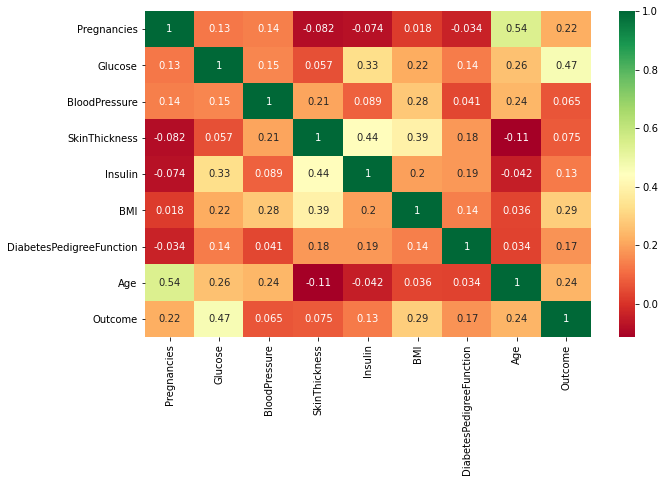

In [25]:
# get correlation of each feature in the datset
corrmat = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [ ]:
# recursive feature elimination


In [31]:
X = data.iloc[:,0:8]  #independent columns
y = data.iloc[:,-1]

In [32]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [33]:
from  sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=1)

In [35]:
# building the logistic regression model
from sklearn.linear_model import LogisticRegression

clf_lr =LogisticRegression(random_state=1)
lr_baseline_model =clf_lr.fit(X_train,y_train)

In [36]:
# emplimentation of feature selection techniques

In [38]:
from sklearn.linear_model import LogisticRegression
clf_lr =LogisticRegression(random_state=1)
lr_baseline_model =clf_lr.fit(X_train,y_train)

In [42]:
#noting down the accuracy of the baseline model
from sklearn.metrics import accuracy_score, f1_score

# finding our predicted values
y_pred = lr_baseline_model.predict(X_test)

# calculating the accc and score
ac= accuracy_score(y_test,y_pred)
f_score =f1_score(y_test,y_pred)

print("baseline model accuracy:",ac)
print("baseline model f1 score:",f_score)

baseline model accuracy: 0.7795275590551181
baseline model f1 score: 0.6455696202531646


In [48]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=clf_lr,step=1)

fit =rfe.fit(X_train,y_train)

print("numfeature: %d"  % fit.n_features_)
print("selected features %s"  % fit.support_)
print("feature ranking %s" % fit.ranking_)

numfeature: 4
selected features [ True  True False False False  True  True False]
feature ranking [1 1 3 4 5 1 1 2]


In [49]:
# representing feature rank in the form of table

In [51]:
selected_rfe_features =pd.DataFrame({'Feature':list(X_train.columns),'Rankings':rfe.ranking_})
selected_rfe_features.sort_values(by='Rankings')

,Feature,Rankings
0,Pregnancies,1
1,Glucose,1
5,BMI,1
6,DiabetesPedigreeFunction,1
7,Age,2
2,BloodPressure,3
3,SkinThickness,4
4,Insulin,5


In [52]:
# creating the new subset of data with only the selected features
X_train_rfe =rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# fitting our baseline model
lr_rfe_model =clf_lr.fit(X_train_rfe,y_train)

In [53]:
# comaprison of model perfo witha nd without feaature selection

In [56]:
# making pred and evaluating the model\
y_pred_rfe = lr_rfe_model.predict(X_test_rfe)

rfe_ac= accuracy_score(y_test,y_pred_rfe)
rfe_fscore =f1_score(y_test,y_pred_rfe)

print("num features: %d" % fit.n_features_)
print("selected features: %s" % fit.support_)
print("feature rankings: %s" % fit.ranking_)

num features: 4
selected features: [ True  True False False False  True  True False]
feature rankings: [1 1 3 4 5 1 1 2]


In [63]:
selected_rfe_features =pd.DataFrame({'Feature':list(X_train.columns),'Rankings':rfe.ranking_})
selected_rfe_features.sort_values(by='Rankings')

,Feature,Rankings
0,Pregnancies,1
1,Glucose,1
5,BMI,1
6,DiabetesPedigreeFunction,1
7,Age,2
2,BloodPressure,3
3,SkinThickness,4
4,Insulin,5


In [64]:
# creating the new subset of the dat  with only the selected features

In [65]:
#transforming the data
X_train_rfe =rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# fitting baseline model with transformed data
lr_rfe_model = clf_lr.fit(X_train_rfe, y_train)

In [67]:
# comparison of model performance with or without feature selection
# making pred and evaluating the model

In [68]:
y_pred_rfe = lr_rfe_model.predict(X_test_rfe)

rfc_sc=accuracy_score(y_test,y_pred_rfe)
rfe_fscore=f1_score(y_test,y_pred_rfe)

print("rfe model accuracy:",rfe_ac)
print("rfe model f1 score:", rfe_fscore)

rfe model accuracy: 0.7795275590551181
rfe model f1 score: 0.641025641025641
